# Muhammad Shafeen
# 22P-9278
# BS-AI-4A
# Task 7

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Function for reading a file

In [2]:
def read_file(Filename):
    concat="/home/shafeenkhan/Documents/My-all-programs--/Semester-4/Aritificial Intelligence/LAB-08/"+Filename+".csv"
    df=pd.read_csv(concat)
    return df

In [3]:
df=read_file(Filename="titanic")

## Cleaning The Data


In [4]:
df["Sex"]=df["Sex"].map({'male':1,'female':0}) #hot encoding , changing data into numerical
df["Embarked"]=df["Embarked"].map({'S':2,'c':3,'Q':4}) #hot encoding , changing data into numerical
df["Embarked"]=df["Embarked"].ffill() 
X_train_X=df[["Pclass","Age","SibSp","Parch","Fare"]]
y_test_y=df["Survived"]
X_train_X=X_train_X.ffill()
y_test_y=y_test_y.ffill()

## Function For putting the features and categorical Features ,  working on them and making them go through the model

In [5]:
Acc=[]
size_k=[1,2,3,4,5] # different values of K 
def Working(): # This function is to read the file and choose whether user wants to open the file with read command or write command
            try: #  using try and except for better handling of errors
                for i in range(0,len(size_k)):
                        X_train, X_test, y_train, y_test = train_test_split(X_train_X, y_test_y, test_size=0.2, random_state=i)
                        knn = KNeighborsClassifier()
                        knn.fit(X_train, y_train)
                        y_pred = knn.predict(X_test)
                        accuracy = accuracy_score(y_test, y_pred)
                        Acc.append(accuracy)
                        print(f"Accuracy for the value of K ( {i+1} ) is : {accuracy}")
            except:
                print("Caught An Error") 


## Calling the function

In [6]:
Working()

Accuracy for the value of K ( 1 ) is : 0.6815642458100558
Accuracy for the value of K ( 2 ) is : 0.6312849162011173
Accuracy for the value of K ( 3 ) is : 0.6312849162011173
Accuracy for the value of K ( 4 ) is : 0.6201117318435754
Accuracy for the value of K ( 5 ) is : 0.6871508379888268


## Plotting

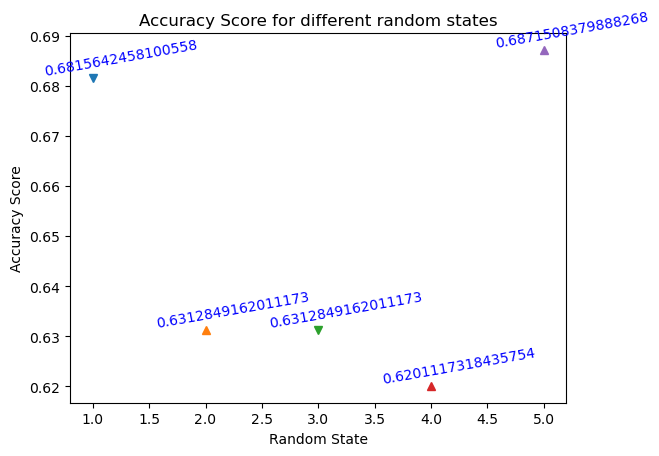

In [7]:
def label_bars(heights, x_coords):
    for height, x_coord in zip(heights, x_coords):
        plt.annotate(f'{height}',
                     xy=(x_coord, height),
                     xytext=(20, 0),  # 4 points vertical offset.
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color='b', size=10,rotation=10)
plt.plot(size_k[0], Acc[0], 'v')
plt.plot(size_k[1], Acc[1], '^')
plt.plot(size_k[2], Acc[2], 'v')
plt.plot(size_k[3], Acc[3], '^')
plt.plot(size_k[4], Acc[4], '^')
plt.xlabel('Random State')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for different random states')

# Add text annotations for each data point
label_bars(Acc, size_k)

plt.show()